
# Probability

## Key Concepts:

### Sample Space

All the possible outcomes of an experiment. Examples:
    - Flip of a coin: Ω = {'Cara','Coroa'}
    - Roll of a dice: Ω = {1,2,3,4,5,6}
    
Omega is the nomenclature for a sample space: <b> Ω = {} </b>

### Event



Subset of our sample space:
- even number of dice $\rightarrow $ <b> A = {2, 4, 6} </b>
    

### Probability

The probability of an event to happen is: 

$$P(event) = \frac{\text{number of outcomes of an event}}{\text{number of outcomes of the sample space}}$$

$$P(A) = \frac{len(A)}{len(Ω)} = \frac{3}{6} = \frac{1}{2} = 50\% $$

### What is the probability of the entire sample space?

$$P(A) = \frac{len(Ω)}{len(Ω)} = 1 = 100\% $$

## Simulating scenarios

In [1]:
import numpy as np

In [2]:
def is_even(x):
    if x % 2 == 0:
        return True
    else:
        return False
    
dice = [1, 2, 3, 4, 5, 6]

dice_rolls = np.random.choice(dice, size=1000000)

count_events = len([item for item in dice_rolls if is_even(item)])
count_rolls  = len(dice_rolls)

print(f'{count_events / count_rolls *100:.1f}%')

50.0%


## Union

Event: 

A = even = {2, 4, 6}<br>
B = greater than 4 = {5, 6}

A U B = {2, 4, 5, 6}

### Mutual Exclusivity

Events that have no intersection: 

Events: even and odd numbers of dice

A = {1, 3, 5}<br>
B = {2, 4, 6}

$ A ∩ B = \{\} $

In [3]:
# What is the sum of the probability of all mutual exclusive events ?

# P(1) + P(2) + P(3) + ... + P(6) = 100%

Event: 

A = even = {2, 4, 6} <br>
C = less than 4 = {1, 2, 3}

Are they mutually exclusive?

No, because 𝐴∩C = {2}

### Conditional Probability

P(A|B) $\rightarrow$ Probability of event A to happen given that event B happens

$$ P(A|B) = \frac{P(𝐴∩𝐵)}{P(B)} $$

Example:

The probability that a die roll is less than 3 given that it is odd

Sample Space = {1,2,3,4,5,6}

Events:
- A = less than 3 = {1,2}
- B = odd = {1,3,5}

- A ∩ B = {1}

$$ P(A|B) = \frac{P(𝐴∩𝐵)}{P(B)} = \frac{1}{3} $$

-----

## Mounty Hall Problem

In [4]:
def mounty_hall(decision):
    choices = [1,2,3]
    your_choice = np.random.choice(choices)
    premium = np.random.choice(choices)
    #print(choices, premium)
    # open a door
    cabras = [item for item in choices if item != premium]
    #print(cabras)
    
    # select a cabra from a subset that is not your choice
    door_to_open = np.random.choice([door for door in cabras if door != your_choice])
    
    # remove cabra from choices
    choices.remove(door_to_open)
    doors_remaining = choices
    
    #print(your_choice, premium,  choices, door_to_open)
    
    # switch choices
    doors_remaining.remove(your_choice)
    
    if decision == 'switch':
        final_choice = doors_remaining
    else:
        final_choice = your_choice
        
    #print(final_choice, premium)
    if final_choice == premium:
        return True
    else:
        return False

In [5]:
import numpy as np
np.mean([mounty_hall('not switch') for i in range(100000)])

0.33358

# DISCRETE PROBABILITY DISTRIBUTIONS

In [61]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Random Variables

The map of <b>outcomes $\rightarrow$ numbers</b>

Discrete vs Continuous Distributions:

Discrete
- Dice roll
- Nome escolhido aleatoriamente

Continuous
- Renda de um cliente aleatorio
- Peso de um animal do meu dataset

### Discrete Uniform Distribution

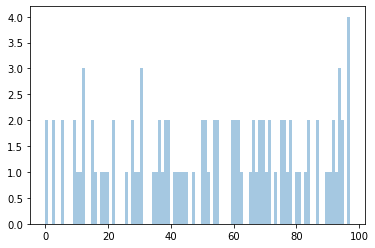

In [8]:
sns.distplot(np.random.randint(0, 100, size=100), kde=False, bins = 100)

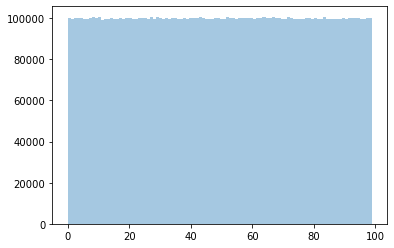

In [73]:
sns.distplot(np.random.randint(0, 100, size=10000000), kde=False, bins = 100)

In [74]:
megasena = pd.read_csv("https://gist.githubusercontent.com/ikkebr/ce0b74f6d0dbf5a42015/raw/7f5120491feba60906946b56f5b88fb44382f11a/megasena.csv", sep=';')
megasena.head()

,Data,D1,D2,D3,D4,D5,D6,Arrecadacao_Total,Sena,Rateio_Sena,Quina,Rateio_Quina,Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado
0,11/03/1996,4,5,30,33,41,52,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23
1,18/03/1996,9,37,39,41,43,49,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃƒO,0.00
2,25/03/1996,10,11,29,30,36,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃƒO,0.00
3,01/04/1996,1,5,6,27,42,59,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75
4,08/04/1996,1,2,6,16,19,46,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85


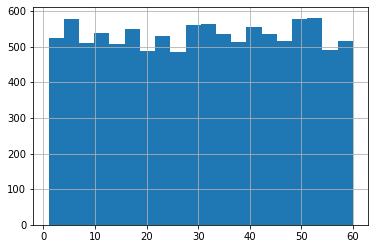

In [79]:
numeros = pd.concat([megasena.D1, 
                     megasena.D2, 
                     megasena.D3, 
                     megasena.D4, 
                     megasena.D5, 
                     megasena.D6]).reset_index(drop=True)
numeros
numeros.hist(bins=20)

In [80]:
numeros.value_counts(normalize=True).sort_values(ascending=False)

5     0.019437
51    0.019061
53    0.018967
42    0.018592
4     0.018498
33    0.018404
23    0.018122
24    0.018122
41    0.017934
10    0.017934
54    0.017934
17    0.017840
29    0.017840
49    0.017746
52    0.017653
28    0.017559
13    0.017559
27    0.017465
36    0.017465
30    0.017277
50    0.017277
32    0.017277
44    0.017183
43    0.017183
16    0.017183
2     0.017183
31    0.017089
12    0.017089
47    0.016995
37    0.016901
34    0.016808
8     0.016714
56    0.016620
18    0.016620
7     0.016620
38    0.016526
1     0.016338
58    0.016338
59    0.016244
6     0.016244
46    0.016150
35    0.016056
20    0.016056
60    0.015962
45    0.015775
3     0.015681
11    0.015493
40    0.015493
19    0.015305
48    0.015211
14    0.015117
57    0.015117
15    0.015023
39    0.014836
9     0.014648
25    0.014648
21    0.014366
55    0.014272
26    0.013521
22    0.013427
dtype: float64

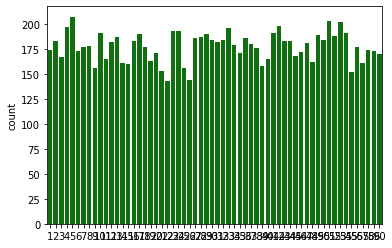

In [81]:
sns.countplot(x=numeros, color='green', orient='h');

### Bernoulli Distribution


The distribution for 0 and 1 outcomes. If the probability of an event being true is p, then the probability of it being false will be 1-p (because it has to sum 1, remember?)

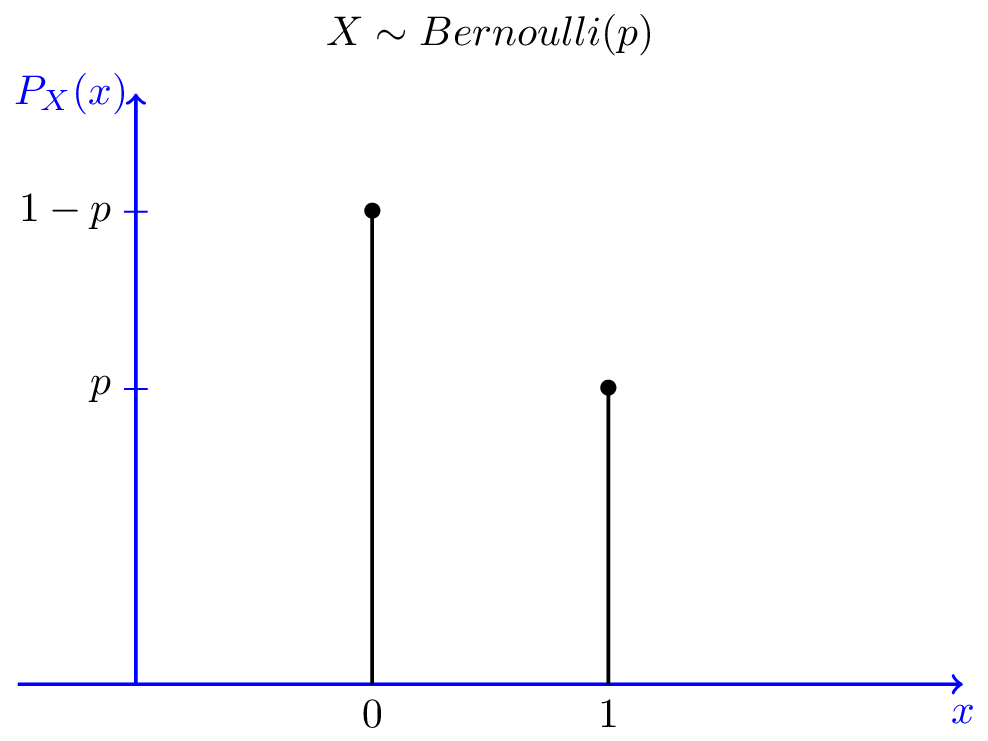

example:

- biased coin

### Binomial Distribution


This is the same as before, except it is now a <b>sequence</b> of events. For instance, imagine you flip a coin twice. 
The binomial distribution represents the probability of obtaining exactly <b>k</b> successes flipping the coin <b>n</b> times.

### The Binomial Distribution in Python


<b>Example: </b>The probability of a biased coin with a 30% chance of heads, being heads 5 times in 10 flips

### PROBABILITY MASS FUNCTION (PMF)

A function that gives the probability that a discrete random variable is <b> exactly </b> equal a  specific value.

For binomial distribution, you create it given:
    $$ binom(n, p)$$ 

In [165]:
from scipy.stats import binom

# 10 flips
# 0.3 chance of success

dist = binom(10, 0.3)

In [166]:
# probability of obtaining exactly 5 successes (exactly 5 times == 'HEADS')
dist.pmf(5)

0.10291934520000003

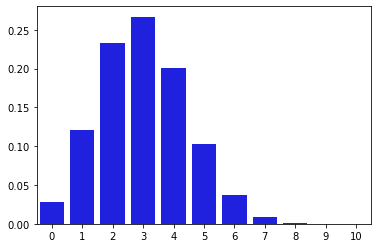

In [167]:
sns.barplot(x=np.arange(0,11), 
            y=dist.pmf(np.arange(0,11)),
            color='blue')

OR you can simulate this game.

In [168]:
np.random.choice([0, 1], p=[0.7, 0.3], size=10).sum() == 5

False

In [169]:
np.mean([(np.random.choice([0, 1], p=[0.7, 0.3], size=10).sum() == 5) for i in range(10000)])

0.1033

In [170]:
from collections import Counter

In [171]:
# using numpy
np.mean([Counter(np.random.choice(['HEADS','TAILS'], p=[0.3, 0.7], size=10) )['HEADS'] == 5 for j in range(100000)])

0.10185

In [198]:
(np.random.binomial(10, 0.3))

3

In [19]:
(np.random.binomial(10, 0.3, size=100))

array([2, 5, 5, 3, 3, 5, 2, 2, 2, 2, 4, 4, 5, 3, 3, 3, 1, 2, 2, 0, 2, 6,
       4, 2, 3, 1, 2, 1, 4, 0, 5, 5, 4, 1, 2, 3, 2, 2, 3, 2, 4, 4, 4, 1,
       5, 2, 3, 3, 2, 1, 5, 4, 3, 5, 2, 4, 3, 3, 5, 2, 2, 4, 5, 3, 2, 1,
       2, 6, 2, 3, 2, 3, 3, 4, 2, 3, 3, 3, 2, 3, 2, 1, 1, 3, 1, 3, 5, 3,
       2, 4, 3, 2, 3, 2, 5, 1, 6, 5, 4, 1])

In [20]:
(np.random.binomial(10, 0.3, size=100) == 5)

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])

In [21]:
(np.random.binomial(10, 0.3, size=1000000) == 5).mean()

0.102382

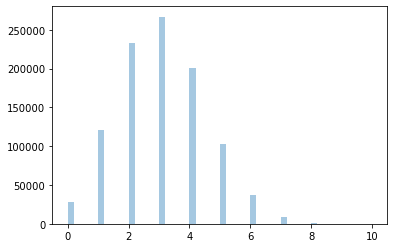

In [200]:
# plot

sns.distplot(np.random.binomial(10, 0.3, size=1000000), kde=False)

### Geometric Distribution


The geometric distribution describes how many trials are needed before we get an outcome of success (where only 2 outcomes exist - success and failure).

### The Geometric Distribution in Python


<b>Example:</b> The probability that it will take exactly 5 trials to get a first success for a 80% biased coin.

In [210]:
from scipy.stats import geom
dist = geom(0.8)

dist.pmf(3)

0.03199999999999999

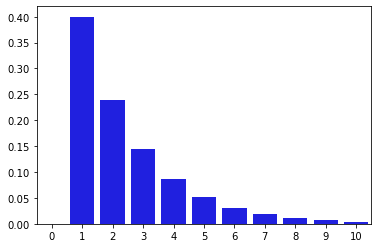

In [225]:
dist = geom(0.4)

sns.barplot(x=np.arange(0,11), 
            y=dist.pmf(np.arange(0,11)),
            color='blue')

In [227]:
(np.random.geometric(0.4, size=10000000) == 1).mean()

0.4001111

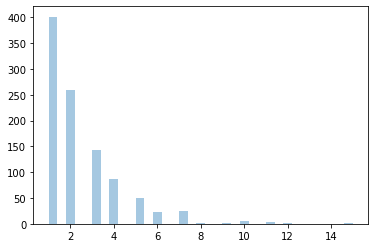

In [228]:
sns.distplot(np.random.geometric(0.4, size=1000), kde=False);

# Poisson Distributions

The Poisson distribution is popular for modeling the number of times an event occurs in an interval of time or space.


<b> Example </b>: Imagine you have a dataset and discover that the average number of clients in a fast food is ~5 a minute. 
What is the probability of the fast food receiving 7 new clients on the next minute? 

Conditions for Poisson Distribution:

* An event can occur any number of times during a time period.
* Events occur independently. 
* The rate of occurrence is constant; that is, the rate does not change based on time.
* The probability of an event occurring is proportional to the length of the time period. 

In [229]:
from scipy.stats import poisson

In [232]:
average = 5
dist = poisson(average)

In [235]:
dist.pmf(5)

0.17546736976785068

In [238]:
dist.pmf(10)

0.018132788707821854

<BarContainer object of 11 artists>

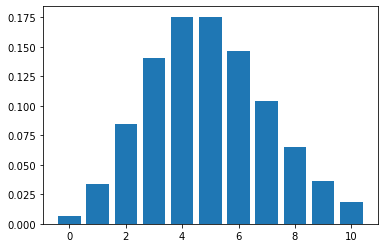

In [240]:
plt.bar(range(11), dist.pmf(range(11)))

## Example 2

A call center receives an average of 4.5 calls every 5 minutes. Each agent can handle one of these calls over the 5 minute period. If a call is received, but no agent is available to take it, then that caller will be placed on hold. Assuming that the calls follow a Poisson distribution, what is the minimum number of agents needed on duty so that calls are placed on hold at most 10% of the time?

In [241]:
average = 4.5
dist = poisson(average)

$ P(\text{numero de ligacoes} > \text{telefonistas}) \le 10\% $

OU

$ P(\text{numero de ligacoes} \le \text{telefonistas}) > 90\% $

Probabilidade do número de ligações ser igual a zero:

In [242]:
dist.pmf(0)

0.011108996538242306

$P(X = 0) = 0.011$<br>

Probabilidade do número de ligações ser igual a 1:
    

In [243]:
dist.pmf(1)

0.049990484422090385

$P(X = 1) = 0.050$

Qual a probabilidade então do número de ligações ser $\le$ 1

In [246]:
dist.pmf(0) + dist.pmf(1) + dist.pmf(2) + dist.pmf(3)

0.34229595583459105

In [247]:
dist.cdf(7)

0.913413528352644

$P(X = 0) = 0.011$<br>
$P(X = 1) = 0.050  \rightarrow P(X \le 1) = 0.066 $<br>
$P(X = 2) = 0.112  \rightarrow P(X \le 2) = 0.173 $<br>
$P(X = 3) = 0.168  \rightarrow P(X \le 3) = 0.342 $<br>
$P(X = 4) = 0.190  \rightarrow P(X \le 4) = 0.532 $<br>
$P(X = 5) = 0.170  \rightarrow P(X \le 5) = 0.703 $<br>
$P(X = 6) = 0.128  \rightarrow P(X \le 6) = 0.831 $<br>
$P(X = 7) = 0.082  \rightarrow P(X \le 7) = 0.913 $<br>

# Cumulative distribution function

In [41]:
average = 4.5
dist = poisson(average)

# cumulative distribution function
dist.cdf(10)

0.9933313279128181

# Normal Distribution

In [252]:
from scipy.stats import norm

dist = norm()

In [57]:
dist.pdf(0)

0.3989422804014327

In [253]:
dist.cdf(0)

0.5

In [254]:
dist.cdf(1)

0.8413447460685429

In [255]:
dist.cdf(1) - dist.cdf(-1)

0.6826894921370859

In [256]:
dist.cdf(2) - dist.cdf(-2)

0.9544997361036416

In [257]:
dist.cdf(3) - dist.cdf(-3)

0.9973002039367398

# Example World Cup

In [248]:
## Probabilidade de se fazer 7 gols em 1 jogo de copa do mundo?
df = pd.read_csv('WorldCupMatches.csv')

In [249]:
df.dropna().query('Year == 2014.0').query('`Away Team Name` == "Brazil"')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
806,2014.0,23 Jun 2014 - 17:00,Group A,Estadio Nacional,Brasilia,Cameroon,1.0,4.0,Brazil,,69112.0,1.0,2.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255931.0,300186472.0,CMR,BRA


In [251]:
df.sample(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,1990.0,14 Jun 1990 - 17:00,Group B,Stadio San Nicola,Bari,Cameroon,2.0,1.0,Romania,,38687.0,0.0,0.0,SILVA ARCE Hernan (CHI),SILVA VALENTE Carlos Alberto (POR),PEREZ HOYOS Armando (COL),322.0,108.0,CMR,ROU
2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,1978.0,07 Jun 1978 - 13:45,Group 3,Estadio Jos� Mar�a Minella,Mar Del Plata,Brazil,0.0,0.0,Spain,,34771.0,0.0,0.0,GONELLA Sergio (ITA),KLEIN Abraham (ISR),ITHURRALDE Arturo Andres (ARG),278.0,2246.0,BRA,ESP


In [45]:
df = df.drop_duplicates()

In [46]:
df['total_goals'] = df['Away Team Goals'] + df['Home Team Goals']

In [47]:
df['Away Team Goals']

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
832    1.0
833    1.0
834    0.0
835    1.0
852    NaN
Name: Away Team Goals, Length: 837, dtype: float64

In [48]:
team_name = 'Brazil'

other_team = 'Germany'

In [49]:
df.query(f'`Home Team Name` == "{team_name}" and `Away Team Name` == "{other_team}"')

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,total_goals
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,...,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER,8.0


In [50]:
 pd.concat([df.query(f'`Home Team Name` == "{team_name}" and `Away Team Name` == "{other_team}"')['Home Team Goals'], 
                     df.query(f'`Away Team Name` == "{team_name}" and `Home Team Name` == "{other_team}"')['Away Team Goals']])

826    1.0
643    2.0
dtype: float64

In [51]:
average = pd.concat([df.query(f'`Home Team Name` == "{team_name}" and `Away Team Name` == "{other_team}"')['Home Team Goals'], 
                     df.query(f'`Away Team Name` == "{team_name}" and `Home Team Name` == "{other_team}"')['Away Team Goals']]).mean()
average

1.5

In [52]:
average

1.5

In [53]:
dist = poisson(average)

In [54]:
# de quantos em quantos jogos eu faço 7 gols

100 / (dist.pmf(7) * 100)

1322.0060599252374

In [55]:
(dist.pmf(7) * 100)

0.07564261846549723

Of course, we're breaking some of the hypothesis. But that gives us an idea.


Listen to this podcast to hear some interesting applications of the Poisson distribution!

http://lineardigressions.com/episodes/2018/10/21/better-know-a-distribution-the-poisson-distribution